<a href="https://colab.research.google.com/github/rajaramkuberan/ANN_Coursework_Coventry_Univ/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **7088 CEM - Artificial Neural Network Coursework**
##**Coventry University**

###**Project Contributors**

####**Rajaram Kuberan, Ashish Solanki**



# **Topic: Image Classification of Grocery Items for Ketogenic Shopping Using CNN Architectures**

This project Worflow is carried out in five parts:

**1. Data Collection**

**2. Data Preprocessing**

**3. CNN Architecture Selection and Modelling**

**4. Image Classification and Prediction**

**5. Metrics Calculation**

There are two architectures used for this Coursework:

1. GoogLeNet Architecture
2. Transfer Learning

In this Colab Notebook, the second  architecture - Transfer Learning using MobileNet architecture is explained. The first architecture is explained: GoogLeNet Architecture without Transfer Learning and with Transfer Learning in another Colab Notebook -[Link](https://github.com/rajaramkuberan/ANN_Coursework_Coventry_Univ/blob/main/ANN_CourseWork_GoogLeNet_Rajaram_Kuberan.ipynb)

Code Link for whole project - [Github link](https://github.com/rajaramkuberan/ANN_Coursework_Coventry_Univ.git).

##**1. Data Collection**

  The dataset used for this project is not taken directly from Kaggle or UCI data repository. We have novelly scrapped the images from the UK top supermarket webistes, and also added images from two projects where grocery images were used for performing Classification.

###**1.1 Image Scrapping**

  Data is collected by scrapping images from websites like [Tesco](https://www.tesco.com/groceries/) and [Morrisons](https://groceries.morrisons.com/browse). Additionally the dataset from [Grocery Dataset](https://github.com/marcusklasson/GroceryStoreDataset/tree/master/dataset) and [Freiburg Grocery Dataset](http://aisdatasets.informatik.uni-freiburg.de/freiburg_groceries_dataset/) are also used. For Image Scrapping, Automation Tool - Selenium written in Java is used in this project. The Selenium with Python was also used. But Java Selenium combination helped us to scrap nearly 1500 images in a single exection of code. In this way, we could scrap nearly 12500+ images from Tesco website and 7500+ images from Morrisons website. The Grocery and Freiburg Dataset contains 5000 images respectively. So, totally we have 30000+ images to perform Classification.

###**1.2 Selenium Java code Link**

  Below are the Github link for selenium Java code:

Tesco Selenium Java codes - [Link](https://github.com/rajaramkuberan/ANN_Coursework_Coventry_Univ/blob/main/Data_Image_Web_scrapping/tesco_selenium.java)

Morrisons Selenium Java - [Link](https://github.com/rajaramkuberan/ANN_Coursework_Coventry_Univ/blob/main/Data_Image_Web_scrapping/Morrisons_Selenium.java)

Dependencies required to execute do Automated Image Scrapping: 
1. Chromedriver - [Link](https://github.com/rajaramkuberan/ANN_Coursework_Coventry_Univ/tree/main/Data_Image_Web_scrapping/chromedriver_win32)

2. Maven Repository and Selenium Ashot - [Link](https://github.com/rajaramkuberan/ANN_Coursework_Coventry_Univ/blob/main/Data_Image_Web_scrapping/selenium_ashot.txt)

3. XML Pom file where the dependencies are listed to run the Java Selenium code: [Link](https://github.com/rajaramkuberan/ANN_Coursework_Coventry_Univ/blob/main/Data_Image_Web_scrapping/Automation/Images/pom.xml)

###**1.3 Importing Data from the Github**

Git clone is used to import the data from Github to Google Colab. The GPU runtime is used to run the CNN model due to its heavy computational dependencies.

In [1]:
!git clone https://github.com/rajaramkuberan/ANN_Coursework_Coventry_Univ.git

Cloning into 'ANN_Coursework_Coventry_Univ'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 30393 (delta 0), reused 0 (delta 0), pack-reused 30390
Receiving objects: 100% (30393/30393), 6.12 GiB | 22.86 MiB/s, done.
Resolving deltas: 100% (335/335), done.
Checking out files: 100% (31425/31425), done.


##**2. Data Preprocessing**

In this worflow, the dataset of 30000+ images are splitted randomly in the ratio of 80:20.

The images are segregated, and stored in separate folders named train and test.

Splitting the data code Link: [Python Code](https://github.com/rajaramkuberan/ANN_Coursework_Coventry_Univ/blob/main/splitting_the_data.ipynb)

###**2.1 Importing the Necessary Libraries**

The necessary libraries are imported for performing Data Preprocessing and CNN Transfer Learning Modelling.

In [2]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import MobileNetV3Large, VGG19, VGG16, MobileNetV2,InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

###**2.2 Image Preprocessing**

In this process, ImageDataGenerator class is used to create our train and test dataset for binary classification.Moreover, data is also normalised.

####**2.2.1 Data/Image Normalisation**

It's important to normalize our data because most of the CNN architecture accepts images in particular pixel values to improve its overall performance. The MobileNet Architecture accepts inputs with pixel 224x224.

For this, the rescale parameter is used to scale our image pixel values from [0, 255] to [0,1].

In each generator, we specify the source directory of our images, the classes, the input image size, the batch size (how many images to process at once), and class mode.

In [3]:
# initialising the image size as 224x224
IMAGE_SIZE = [224,224]


# Setting the Path to test and train data 
test_path = '/content/ANN_Coursework_Coventry_Univ/test'
train_path = '/content/ANN_Coursework_Coventry_Univ/train'

In [4]:
# transforming train data images
train_datagen = ImageDataGenerator(rescale = 1/255)

# transforming train data images
test_datagen = ImageDataGenerator(rescale = 1/255)


In [5]:
#training data 
train_generator = train_datagen.flow_from_directory(
        '/content/ANN_Coursework_Coventry_Univ/train',  # This is the source directory for training images
        classes = ['Keto_train', 'Non_Keto_train'],
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=32,
        # Use binary labels
        class_mode='binary')

# testing data
test_generator = test_datagen.flow_from_directory(
        '/content/ANN_Coursework_Coventry_Univ/test',  # This is the source directory for training images
        classes = ['Keto_test', 'Non_Keto_Test'],
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=16,
        # Use binary labels
        class_mode='binary')

Found 24861 images belonging to 2 classes.
Found 6163 images belonging to 2 classes.


##**3. Building the Model**

In this project, Transfer Learning with MobileNet Architecture is used to perform Image Classification on Ketogenic and Non-Ketogenic Food items. The Keras Library is used to build the MobileNet CNN architecture. The training/test datas are pushed into the Github repository.

By incorporating all the four changes discussed in the GoogLeNet architecture, The transfer Learning using Mobilenet Architectures is trained.  To reiterate, the four changes implemented are:

1. Using Imagenet Weights for training.
2. Controlling the learning rate of the optimizers.
3. Using L2 regularization
4. Using Sigmoid function instead of Softmax to perform Classification in the output layer.



####**3.1 Creating Transfer Learning Architecture using MobileNet Architecture**

In [6]:
model = Sequential()

#Transfer Learning with latest MobileNet Architecture is used(Change 1)

model.add(MobileNetV2(include_top = False, weights="imagenet", input_shape=(224, 224, 3)))
model.add(tf.keras.layers.GlobalAveragePooling2D())

# L2 regularizer(Change 3) and Sigmoid function is used(Change 4)

model.add(Dense(1, activation = 'sigmoid',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.layers[0].trainable = False

9412608/9406464 [==============================] - 0s 0us/step


####**3.2 Model Compilation/Execution**

In [7]:
from tensorflow.keras.optimizers import RMSprop, Adam

from tensorflow.keras import optimizers

#model.compile(optimizer=Adam, loss = 'binary_crossentropy', metrics = 'accuracy')
model.compile(optimizer=RMSprop(lr=0.001), loss = 'binary_crossentropy', metrics = 'accuracy') # Change 2

####**3.3 Fitting/Training the model**
Let's train for 50 epochs. But the ideal training epoch is between 300-400. But HPC/GPU/TPU is required to perform the Transfer Learning modelling efficiently.

Note that steps_per_epoch was set along with batch_size in ImageDataGenerator.

Notice that as we train, our test accuracy never exceeds training accuracy, which is a good thing. Our model won't work better on unseen images than seen images.

In [9]:
MobileNet_fit = model.fit(
      train_generator,
      steps_per_epoch=32,  
      epochs=50,
      verbose=1,
      validation_data = test_generator,
      validation_steps=16)

Epoch 1/50
32/32 [==============================] - 20s 640ms/step - loss: 0.7201 - accuracy: 0.5889 - val_loss: 0.6729 - val_accuracy: 0.6523
Epoch 2/50
32/32 [==============================] - 18s 579ms/step - loss: 0.6684 - accuracy: 0.6270 - val_loss: 0.6417 - val_accuracy: 0.6328
Epoch 3/50
32/32 [==============================] - 18s 580ms/step - loss: 0.6569 - accuracy: 0.6484 - val_loss: 0.6424 - val_accuracy: 0.6406
Epoch 4/50
32/32 [==============================] - 19s 583ms/step - loss: 0.6568 - accuracy: 0.6475 - val_loss: 0.6012 - val_accuracy: 0.6953
Epoch 5/50
32/32 [==============================] - 19s 590ms/step - loss: 0.6416 - accuracy: 0.6582 - val_loss: 0.6776 - val_accuracy: 0.6016
Epoch 6/50
32/32 [==============================] - 19s 587ms/step - loss: 0.6275 - accuracy: 0.6641 - val_loss: 0.6579 - val_accuracy: 0.6172
Epoch 7/50
32/32 [==============================] - 19s 582ms/step - loss: 0.6144 - accuracy: 0.6787 - val_loss: 0.6694 - val_accuracy: 0.6445

##**4. Image Classification and Prediction**

In [10]:
model.evaluate(test_generator)

386/386 [==============================] - 78s 202ms/step - loss: 0.5673 - accuracy: 0.7191


[0.5673012733459473, 0.719130277633667]

###**Inference**

The accuracy is 71.9% for the Transfer Learning with MobilNet architecture when compared to GoogLenet Architecture where the accuracy was around 65%. Even the transfer Learning with GoogLenet achieved an accuracy of 68.5%.

The accuracy of Mobilenet architecture with transfer learning is increased to close 75%, if the epochs are increased to the range 300-400.

In [11]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
preds = model.predict(test_generator,
                      verbose=1)

386/386 [==============================] - 75s 193ms/step


##**5. Metrics Calculation**

Now, calculating the ROC curve and plot it.

First, let's make predictions on our test set. When using generators to make predictions, we must first turn off shuffle (as we did when we created validation_generator) and reset the generator:

In [12]:
fpr, tpr, _ = roc_curve(test_generator.classes, preds)

In [13]:
roc_auc = auc(fpr, tpr)

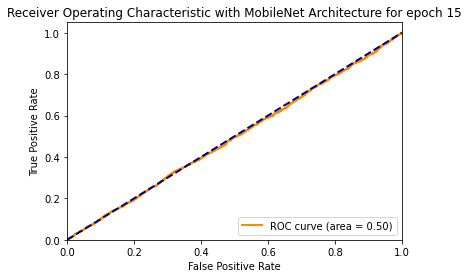

In [15]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic with MobileNet Architecture for epoch 15')
plt.legend(loc="lower right")
plt.show()

###**Inference and Conclusion**

 As shown in the coursework report, the ROC curve for epochs 15 shows AUC as 0.5, which implies the model is not discriminating/classifying properly. But if the epoch is increased to 350, batch_size to 100, AUC increases to 0.7. Even after performing transfer learning with better architecture than GoogLeNet and also implmenting all the four changes from the previous arhitecture, the accuracy and the performance of the model is not upto the expectation.This may be due to 2 reasons. 

1. Clear Labelling of the train and test data is required.
2. Using less amount of data.